In [473]:
import pandas as pd
import numpy as np
import pylab as pl
import os
from bs4 import BeautifulSoup
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Data Gathering

In [474]:
folder_name='D:\data_analysis_FWd\project2'
if not os.path.exists(folder_name):
    os.makedir(folder_name)
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [475]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [476]:
arc_df= pd.read_csv('D:/data_analysis_FWd/project2/twitter-archive-enhanced.csv')
imag_pred =pd.read_csv('D:/data_analysis_FWd/project2/image-predictions.tsv',  sep='\t')
twit_json = pd.read_json ("D:/data_analysis_FWd/project2/tweet_json.txt", lines = True)

# Visual Assessment:
1) there are missing values in some 

2) tweet_id , id, are of type int

# Programatic Assessment

In [477]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [478]:
arc_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [479]:
imag_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [480]:
imag_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,police_van,0.310143,False,minibus,0.068201,False
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True


In [481]:
twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [482]:
twit_json.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Assessment Issues

# Quality issues:

1) Column 'tweet_id' in arc_df is of type "int". It should be changed to type "string" because it is not needed in mathematical operations

2) Column 'time_stamp' in the arc_df is of type string so it should be changed to datetime type

3) There are data related to retweets in arc_df. They are considerd duplications and sould be removed.

4) There are some tweets have no image information.(number of records in arc_df is 2365 however there are only 2075records in image_predections.

5) Columns retweet_count and favorite_count sholud be added to arc_df

6) Data in column 'source' has unneeded simbols and HTML tags. The URLs should be extracted.

7) The data in column 'name' of arc_df starts with small charcters. It should start with capital characters.

8) Data that is not about dogs should be excluded.( removing non-dog tweets)

9) The columns p1, p1_conf, p2 ...etc in image_predections should be changed to have more descriptive names

10) The Ratings data were incorrectly extracted. (there are errors in rating_numerator and rating_denominator). So there is a need to re-extract the correct rating data from column 'full_text' that exists in API (json_copy).

# Tidiness Issues:
1) The column 'id' in twitter Api (twit_json dataframe) is related to column 'tweet_id' in arc_df. So it can be changed to 'tweet_id' to simplify understanding and dealing with the data

2) Columns retweet_count and favorite_count sholud be added to arc_df

3) The columns 'doggo', 'floofer', 'pupper', and 'puppo' in arc_df  can be merged together in one column called 'stage'

4) p1_conf can be added to the arc_df.




### Storing a copy of each gathered file

In [483]:
arc_clean = arc_df.copy()
json_copy= twit_json.copy()
imag_clean = imag_pred.copy()

## Define

### Change the column name of 'id' in twit_json to 'tweet_id'

# Code

In [484]:
json_copy.rename(columns={'id':'tweet_id'},inplace=True)


# Test

In [485]:
json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Define
## modify the datatypes of the columns in the gathered data files
#### The columns to be modified:
imag_predections.tweet_id    int ---------> string

twit_json.tweet_id             int ---------> string

arc_df.tweet_id              int ---------> string

arc_df.rating_numerator         int----------> float

arc_df.rating_numerator         int----------> float

arc_df.timestamp                  sting--------> DateTime

# Code

In [486]:
#imag_predections.tweet_id    int ---------> string
imag_clean['tweet_id'] = imag_clean['tweet_id'].astype(str)

In [487]:
#twit_json.id    int ---------> string
json_copy['tweet_id'] = json_copy['tweet_id'].astype(str)

In [488]:
#arc_df.tweet_id int ---------> string
arc_clean['tweet_id'] = arc_clean['tweet_id'].astype(str)

In [489]:
#arc_df.rating_numerator int----------> float
arc_clean['rating_numerator'] = arc_clean['rating_numerator'].astype(float)

In [490]:
#arc_df.rating_numerator int----------> float
arc_clean['rating_denominator'] = arc_clean['rating_denominator'].astype(float)

In [492]:
#arc_df.timestamp sting--------> DateTime
arc_clean['time_stamp'] = pd.to_datetime(arc_clean['timestamp'])

# Test

In [493]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   object             
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Define
##### image_number column is int. 
####  should be converted to be catgegorical data type

### Code

In [494]:
imag_clean['img_num'] = imag_clean['img_num'].astype(str)

### Check for duplicates in the dataframes

In [495]:
sum(arc_clean.duplicated())

0

In [496]:
sum(imag_clean.duplicated())

0

###  Modify the names of the column to be more descriptive


In [497]:
imag_clean.rename(columns={'p1':'first_predection','p1_conf':'first_conf','p1_dog':'first_isdog','p2':'second_predection','p2_conf':'second_conf','p2_dog':'second_isdog','p3':'third_predection','p3_conf':'third_conf','p3_dog':'third_isdog'},inplace=True)

### Test

In [498]:
imag_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   object 
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   object 
 3   first_predection   2075 non-null   object 
 4   first_conf         2075 non-null   float64
 5   first_isdog        2075 non-null   bool   
 6   second_predection  2075 non-null   object 
 7   second_conf        2075 non-null   float64
 8   second_isdog       2075 non-null   bool   
 9   third_predection   2075 non-null   object 
 10  third_conf         2075 non-null   float64
 11  third_isdog        2075 non-null   bool   
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


### Define
#### Remove duplicated tweets ( retweets) from the archive dataframe.

##### If 'retweeted_status_id' is not null then it is a retweet

### Code

Drop all the data that contains values in 'retweeted_status_id'

Then Drop columns 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' as they are no longer needed

In [499]:
arc_clean= arc_clean[arc_clean.retweeted_status_id.isnull()] 


In [500]:
arc_clean= arc_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

# Test

In [501]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   object             
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Define
#### Remove the tweets that have not images data
Adding a column image_exist to arc_clean dframe: takes True/False values with False if no image available
initialize image_exist  column with False. 
setting image_exist to True if there is image using image_pred Datafrane. Then Remove image_exist since there it is no longer needed


### Code

In [502]:
arc_clean['image_exist']= False

In [503]:
s1=set(arc_clean['tweet_id'])
s2=set(imag_clean['tweet_id'])

for i in s1:
    if i in s2:
        l= arc_clean[arc_clean['tweet_id']==i].index
        arc_clean['image_exist'][l]=True



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Test

In [504]:
type(arc_clean)

pandas.core.frame.DataFrame

In [505]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   object             
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Filter out the tweets with no images

In [506]:
arc_clean=arc_clean[arc_clean['image_exist']==True]
type(arc_clean)

pandas.core.frame.DataFrame

### Test

In [507]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   object             
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   float64            
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

 ##### Re- Drop the column 'image_exist' as it is no longer needed

In [508]:
arc_clean= pd.DataFrame(arc_clean.drop(['image_exist'],axis=1))


# Define
Add columns 'favorite_count' and 'retweet_count' to arc_cleand
using merge:

Merging the dataframes arc_clean and json_copy. the result dataframe called narc_clean

# Code

In [509]:
arc_clean= pd.merge(arc_clean,json_copy[['tweet_id','favorite_count','retweet_count']],on='tweet_id',how='inner')

# Test

In [510]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   object             
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   float64            
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

# Define
Explore the column 'source'

Remove the unneeded tags and symbols

# Code

In [511]:
arc_clean.source.sample(3)

12     <a href="http://twitter.com/download/iphone" r...
500    <a href="http://twitter.com/download/iphone" r...
171    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [512]:
arc_clean['source']=arc_clean['source'].str.extract('(http://[a-zA-Z/.]+)')

# Test

In [513]:
arc_clean.source.sample(3)

917     http://twitter.com/download/iphone
310     http://twitter.com/download/iphone
1156    http://twitter.com/download/iphone
Name: source, dtype: object

In [514]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   object             
 4   source                 1983 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   float64            
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

### Define
#### Remove the non dog data from arc_clean using first_isdog, second_isdog, third_isdog columns from image_prediction dataframe

### Code

In [515]:
arc_clean['dog']= True

In [516]:
not_dog= imag_clean.query('first_isdog == False and second_isdog == False  and third_isdog == False')

In [517]:
s1=list(not_dog['tweet_id'])
s2=set(imag_clean['tweet_id'])

for i in s1:
    l= arc_clean[arc_clean['tweet_id']==i].index
    arc_clean['dog'][l]=False

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [518]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   object             
 4   source                 1983 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   float64            
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

In [519]:
arc_clean.text[6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl'

# Test

In [520]:
arc_clean= arc_clean[arc_clean['dog']==True]

In [521]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   object             
 4   source                 1677 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   rating_numerator       1686 non-null   float64            
 8   rating_denominator     1686 non-null   float64            
 9   name                   1686 non-null   object             
 10  doggo                  1686 non-null   object             
 11  floofer                1686 non-null   object           

In [522]:
new_arc=arc_clean.copy()

# Drop column dog because it is no longer needed

In [523]:
arc_clean=pd.DataFrame(arc_clean.drop(['dog'],axis=1))

# Test

In [524]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   object             
 4   source                 1677 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   rating_numerator       1686 non-null   float64            
 8   rating_denominator     1686 non-null   float64            
 9   name                   1686 non-null   object             
 10  doggo                  1686 non-null   object             
 11  floofer                1686 non-null   object           

# Define
Convert the first character of 'name' to capital letter

# Code

In [525]:
arc_clean['name']= arc_clean['name'].str.title()

In [526]:
arc_clean['name']

1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
          ...   
1989        None
1990           A
1991           A
1992           A
1993        None
Name: name, Length: 1686, dtype: object

# Define

Creating a column 'stage' instead of four columns 'doggo', 'floofer', 'pupper'and 'puppo'


In [527]:
arc_clean['stage'] = arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [528]:
len(arc_clean[arc_clean['stage']=='doggo'])

54

In [529]:
arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## Define
### Re-Extract the rating data( numerator and denominator) correctly from API (json_copy)
##### 1) extract the rating from column 'full_text' in the json_copy

##### 2) separte the two values (numerator/denominator) and stor them in 2 new data frames copied from the orginal frame

##### 3) Merge operation 

##### 4) Merge operation again with the arc_clean dataframe 


## Code

In [530]:
#extract the rating from column 'full_text' in the json_copy and make 2 copies 
ss= json_copy[['tweet_id','full_text']]
ss['rating'] = ss['full_text'].str.extract('(\d\d?/\d\d?)')

s1= ss.copy()
s2= ss.copy()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [531]:
# split the two values (numerator/denominator) and store them in 2 new data frames copied from the orginal frame
s1['rat_numerator']=s1['rating'].apply(lambda x: x.split('/')[0])
s2['rat_denominator']=s2['rating'].apply(lambda x: x.split('/')[1])

In [532]:
# Test
s2['rat_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2349    10
2350    10
2351    10
2352    10
2353    10
Name: rat_denominator, Length: 2354, dtype: object

In [533]:
#convert the types to float
s1['rat_numerator']=s1['rat_numerator'].astype(float)
s2['rat_denominator']=s2['rat_denominator'].astype(float)


In [534]:
# test
s2.head(5)

,tweet_id,full_text,rating,rat_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13/10,10.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13/10,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12/10,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13/10,10.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12/10,10.0


In [535]:
#Merge operation to collect numerator column with the denominator column in one dataframe 
new_rows= pd.merge(s1,s2[['tweet_id','rat_denominator']],on='tweet_id',how='inner')


In [536]:
#test
new_rows.head(5)

,tweet_id,full_text,rating,rat_numerator,rat_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13/10,13.0,10.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13/10,13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12/10,12.0,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13/10,13.0,10.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12/10,12.0,10.0


In [537]:
#Merge operation again to put the rating related data in arc_clean 
arc_clean= pd.merge(arc_clean,new_rows[['tweet_id','rat_numerator','rat_denominator']],on='tweet_id',how='left')

### Test

In [538]:
arc_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,time_stamp,favorite_count,retweet_count,stage,rat_numerator,rat_denominator
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,2017-08-01 00:17:27+00:00,33819,6514,None,13.0,10.0
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,2017-07-31 00:18:03+00:00,25461,4328,None,12.0,10.0
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,2017-07-30 15:58:51+00:00,42908,8964,None,13.0,10.0
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,2017-07-29 16:00:24+00:00,41048,9774,None,12.0,10.0
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,2017-07-29 00:08:17+00:00,20562,3261,None,13.0,10.0


#### Drop the old errornous rating columns 

In [539]:
arc_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Define 
### In some of the tweets, there is no data about the stage of dogs.

### In this case, give a name for the dog stage as "Not_determined"

In [540]:
arc_clean['stage'].replace('None','Not_determined',inplace= True)

In [541]:
arc_clean.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,time_stamp,favorite_count,retweet_count,stage,rat_numerator,rat_denominator
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01 00:17:27+00:00,33819,6514,Not_determined,13.0,10.0
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31 00:18:03+00:00,25461,4328,Not_determined,12.0,10.0
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30 15:58:51+00:00,42908,8964,Not_determined,13.0,10.0
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29 16:00:24+00:00,41048,9774,Not_determined,12.0,10.0
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,2017-07-29 00:08:17+00:00,20562,3261,Not_determined,13.0,10.0
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,2017-07-28 16:27:12+00:00,12041,2158,Not_determined,13.0,10.0
6,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,2017-07-28 00:22:40+00:00,56848,16716,Not_determined,13.0,10.0
7,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,2017-07-27 16:25:51+00:00,28226,4429,Not_determined,13.0,10.0
8,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,2017-07-26 15:59:51+00:00,32467,7711,doggo,14.0,10.0
9,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,http://twitter.com/download/iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,2017-07-26 00:31:25+00:00,31166,7624,Not_determined,13.0,10.0


# Test

In [542]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   object             
 4   source                 1677 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   name                   1686 non-null   object             
 8   time_stamp             1686 non-null   datetime64[ns, UTC]
 9   favorite_count         1686 non-null   int64              
 10  retweet_count          1686 non-null   int64              
 11  stage                  1686 non-null   object           

# Test

# Define
# Add the algorithm first predection confedence (first_conf) to the arc fro image_predection dataframe using merg operation

# Code

In [543]:
arc_clean= pd.merge(arc_clean,imag_clean[['tweet_id','first_conf']],on='tweet_id',how='left')

# Define Convert the type of tweet_id column from int to string as it is not needed in methemetical operations 

# Code

In [544]:
arc_clean['tweet_id'] = arc_clean['tweet_id'].astype(str)
arc_clean['timestamp']=pd.to_datetime(arc_clean['timestamp'])

# Test

In [545]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   datetime64[ns, UTC]
 4   source                 1677 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   name                   1686 non-null   object             
 8   time_stamp             1686 non-null   datetime64[ns, UTC]
 9   favorite_count         1686 non-null   int64              
 10  retweet_count          1686 non-null   int64              
 11  stage                  1686 non-null   object           

## Store Clean data 
### Saving The cleaned data in twitter_archive_master.csv

In [546]:
arc_clean.to_csv('D:/data_analysis_FWd/project2/twitter_archive_master.csv')

# Data Analysis  And Visualization

### Reading the cleaned data into dataframe arc_clean

In [568]:
arc_df= pd.read_csv('D:/data_analysis_FWd/project2/twitter_archive_master.csv')

In [569]:
arc_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,favorite_count,retweet_count,rat_numerator,rat_denominator,first_conf,rating
count,2.000000e+01,2.000000e+01,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,6.949452e+17,4.196984e+09,9233.109727,2817.118031,11.236655,10.262159,0.605150,1.094365
std,4.455933e+16,0.000000e+00,12583.246963,4807.199770,5.180572,3.897662,0.266416,0.276352
min,6.671522e+17,4.196984e+09,81.000000,16.000000,0.000000,2.000000,0.044333,0.000000
25%,6.716877e+17,4.196984e+09,2163.250000,649.250000,10.000000,10.000000,0.378746,1.000000
50%,6.756022e+17,4.196984e+09,4440.000000,1437.500000,11.000000,10.000000,0.606701,1.100000
75%,6.947919e+17,4.196984e+09,11656.750000,3247.750000,12.000000,10.000000,0.851578,1.200000
max,8.558181e+17,4.196984e+09,132810.000000,79515.000000,99.000000,90.000000,0.999984,7.500000


# The sources of the tweets

In [570]:
arc_clean['source'].value_counts()

http://twitter.com/download/iphone    1655
http://twitter.com                      22
Name: source, dtype: int64

Text(0, 0.5, 'Count of Tweets')

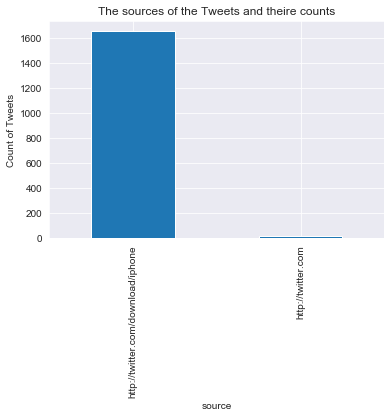

In [571]:
ind=arc_clean['source'].value_counts().index
arc_clean['source'].value_counts()[ind].plot(kind='bar',title='The sources of the Tweets and theire counts')
plt.xlabel('source')
plt.ylabel('Count of Tweets')

### Exploring numbers of ratings in the period of time between Nov, 2015 and Aug 2017

In [572]:
new_arc=arc_clean.copy()
new_arc['rating']=arc_clean['rat_numerator']/arc_clean['rat_denominator']
new_arc['month_year'] = pd.to_datetime(new_arc['timestamp']).dt.to_period('M')
new_arc['month_year'].value_counts(sort=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


2015-11    226
2015-12    289
2016-01    141
2016-02     96
2016-03    107
2016-04     50
2016-05     48
2016-06     69
2016-07     78
2016-08     47
2016-09     57
2016-10     60
2016-11     45
2016-12     52
2017-01     59
2017-02     60
2017-03     44
2017-04     34
2017-05     36
2017-06     41
2017-07     46
2017-08      1
Freq: M, Name: month_year, dtype: int64

Text(0, 0.5, 'Number of Tweets')

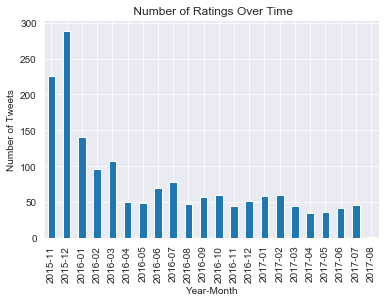

In [573]:
new_arc['month_year'].value_counts(sort=False).plot(kind='bar',title=' Number of Ratings Over Time',)
plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets')

### Exploring Number of tweets in the various dog stages

In [574]:

new_arc.groupby('stage').rating.count()

stage
Not_determined    1426
doggo               54
floofer              8
pupper             176
puppo               22
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

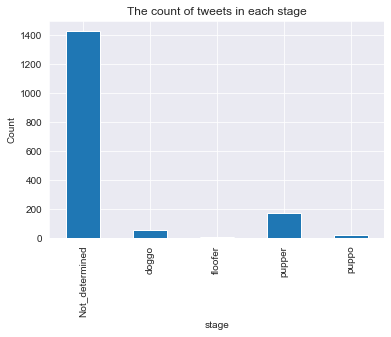

In [575]:
#arc_clean['rating']=arc_clean['rat_numerator']/arc_clean['rat_denominator']
new_arc.groupby('stage').rating.count().plot(kind='bar',title='The count of tweets in each stage')
plt.ylabel('Count')

#### Creating a column Rating= rating_numerator/rating_denominator. 
#### Exploring the values of the new column Rating

Text(0, 0.5, 'Count')

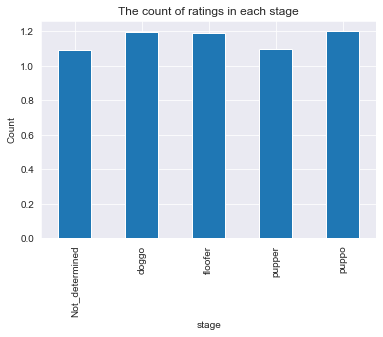

In [576]:
arc_clean['rating']=arc_clean['rat_numerator']/arc_clean['rat_denominator']
arc_clean.groupby('stage').rating.mean().plot(kind='bar',title='The count of ratings in each stage')
plt.ylabel('Count')

## Exploring the Favorite numbers among the various stages of dogs.

In [577]:
arc_clean.groupby('stage').favorite_count.mean()

stage
Not_determined     8796.799439
doggo             19404.240741
floofer           13701.375000
pupper             7766.414773
puppo             22657.181818
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Number of Favorites')

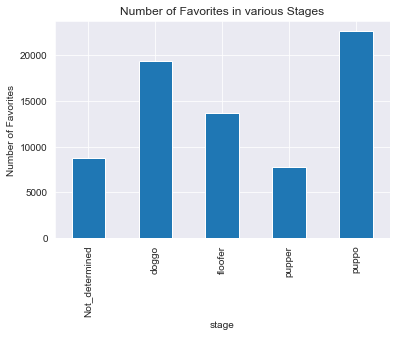

In [578]:
arc_clean.groupby('stage').favorite_count.mean().plot(kind='bar',title='Number of Favorites in various Stages')
plt.ylabel('Number of Favorites')

## Exploring the Retweeting counts among the various stages of dogs.

Text(0, 0.5, 'Number of Retweets')

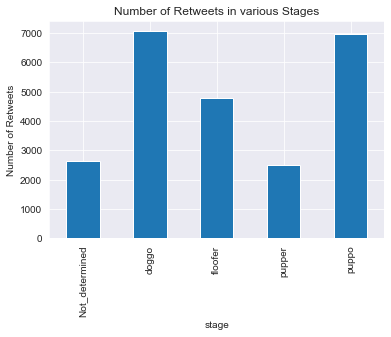

In [579]:
arc_clean.groupby('stage').retweet_count.mean().plot(kind='bar',title='Number of Retweets in various Stages')
plt.ylabel('Number of Retweets')

### The mean value of the confidence values of the first image predection 

In [580]:
arc_clean.groupby('stage').first_conf.mean()

stage
Not_determined    0.600570
doggo             0.575960
floofer           0.577395
pupper            0.640163
puppo             0.703661
Name: first_conf, dtype: float64

Text(0, 0.5, 'Mean of the confedence')

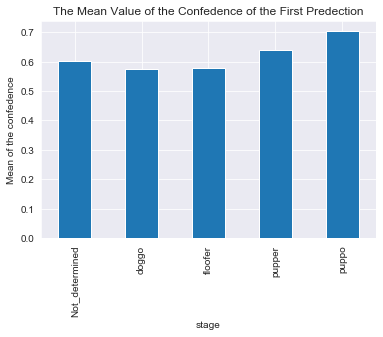

In [581]:
arc_clean.groupby('stage').first_conf.mean().plot(kind='bar',title='The Mean Value of the Confedence of the First Predection')
plt.ylabel('Mean of the confedence')

### Exploring the most frequently used names of dogs

In [582]:
arc_clean.name.value_counts().head(6)

None       419
A           46
Lucy        10
Cooper      10
Charlie     10
Oliver       9
Name: name, dtype: int64

In [583]:
new=arc_clean.copy()

In [584]:
new['rating_year']=arc_clean['timestamp'].dt.year
#arc_clean.info()

In [585]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   datetime64[ns, UTC]
 4   source                 1677 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   name                   1686 non-null   object             
 8   time_stamp             1686 non-null   datetime64[ns, UTC]
 9   favorite_count         1686 non-null   int64              
 10  retweet_count          1686 non-null   int64              
 11  stage                  1686 non-null   object           

### Exploring the Number of Ratings in Each year from 2015 to 2017

In [586]:
new.rating_year.value_counts(sort=False)

2015    515
2016    850
2017    321
Name: rating_year, dtype: int64

Text(0, 0.5, 'count of Ratings')

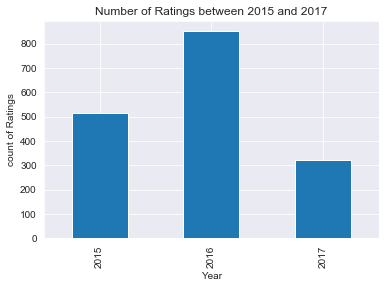

In [587]:
ind=new.rating_year.value_counts(sort=False).index
new.rating_year.value_counts()[ind].plot(kind='bar', title='Number of Ratings between 2015 and 2017')
plt.xlabel('Year')
plt.ylabel('count of Ratings')

### Exploring the statistical distribution of the first result of the predection algorithm

Text(0.5, 0.98, 'Histogram of the 1st predection of Neural Network Algorithm')

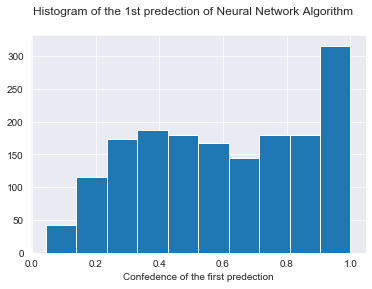

In [588]:
arc_clean['first_conf'].hist()
plt.xlabel('Confedence of the first predection')
pl.suptitle('Histogram of the 1st predection of Neural Network Algorithm')